# Pymaceuticals Inc.
---

### Analysis
    Over the course of 45 days, Capomulin, Ramicane, Infubinol, and Ceftamin all showed progress in tumor regression but Capomulin had promising average results. The Variance and also STD for Capomulin showed that the results were centralized, meaning that the result was normalized when it came to regression, not an outlier. Data showed the weight of the subject usually played a role, with the higher mass of subjects reflecting higher tumor volume, but not always. Capomulin did show promising centered results, but with a large portion of the data set showing that after a usual steady regression, there was a growth in tumor volume later in the time points meaning full remission is not promoised. This further showcased in the increase in metastatic sites per subject, showing an increase in metastatic sites in all subjects the further the time point, although the numbers for Capomulin were lower than some of the other regimens. The analysis of Capomulin showed that while results showed the drug was more effective than some of the other regimins in the study, that the drug was still not able to grant full remission, only progress in reduction of tumor volume. All around, the data shows that the more promising drug may be Ramicane, which yielded the lowest tumor volume in all fields.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how="left")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [121]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].unique())
mouse_count

249

In [122]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = combined_data.groupby(['Mouse ID', 'Timepoint']).size()
duplicate_mouse= duplicate_id[duplicate_id >1].reset_index()['Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [123]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data.isin(duplicate_data)== False].dropna()
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0.0,Capomulin,Female,9.0,22.0
1,f932,0.0,45.0,0.0,Ketapril,Male,15.0,29.0
2,g107,0.0,45.0,0.0,Ketapril,Female,2.0,29.0
3,a457,0.0,45.0,0.0,Ketapril,Female,11.0,30.0
4,c819,0.0,45.0,0.0,Ketapril,Male,21.0,25.0


In [125]:
# Checking the number of mice in the clean DataFrame.
updated_count = len(clean_data["Mouse ID"].unique())
updated_count

248

## Summary Statistics

In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
deviation = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create a dictionary from the provided data
data = {'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance,
        'Tumor Volume Std.Dev.': deviation, 'Tumor Volume Std.Err.': std_err}

# Create a DataFrame from the dictionary
stats_table = pd.DataFrame(data)

# Name the columns
stats_table.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std.Dev.', 'Tumor Volume Std.Err.']

stats_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_table = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Name the columns
agg_stats_table.columns = ['Mean', 'Median', 'Var', 'Std', 'SEM']

agg_stats_table

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

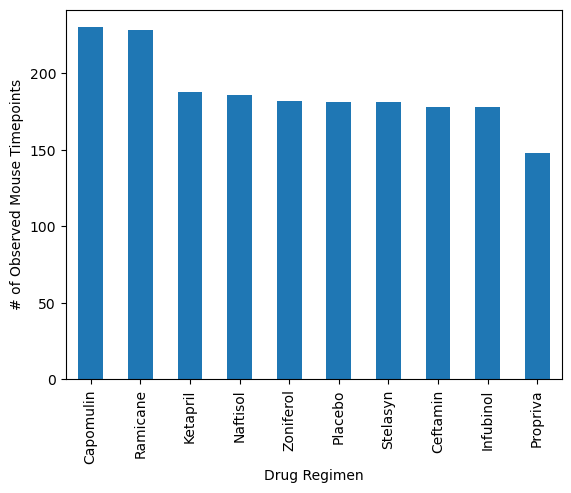

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows for each group
mouse_timepoints = clean_data.groupby('Drug Regimen').size()
mouse_timepoints = mouse_timepoints.sort_values(ascending = False)
# Plot the chart using Pandas
mouse_timepoints.plot(kind='bar', color='tab:blue', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

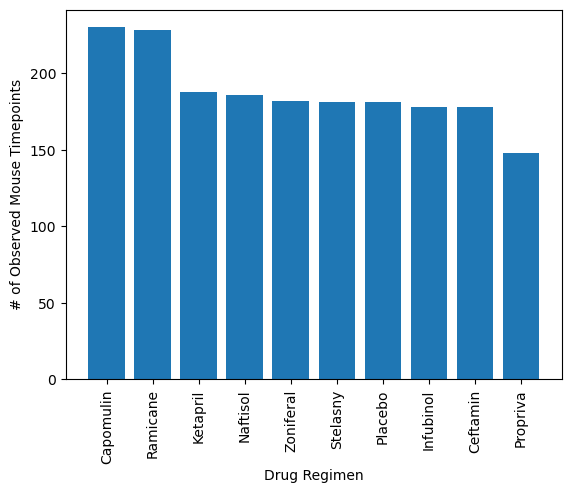

In [129]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows for each group
mouse_timepoints = clean_data.groupby('Drug Regimen').size()
mouse_timepoints = mouse_timepoints.sort_values(ascending = False)
x_axis = clean_data['Drug Regimen'].unique()
plt.bar(x_axis, mouse_timepoints, color='tab:blue',align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferal', 'Stelasny', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'], rotation=90)
plt.show()

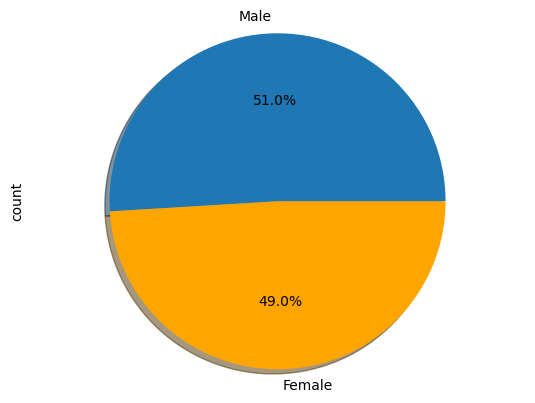

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#set up the chart
pie_data = clean_data['Sex'].value_counts()
labels = ['Male', 'Female']
colors = ['tab:blue', 'orange']

# Create the pie chart using Pandas
pie_data.plot(kind='pie', labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=360)
plt.axis('equal')

plt.show()

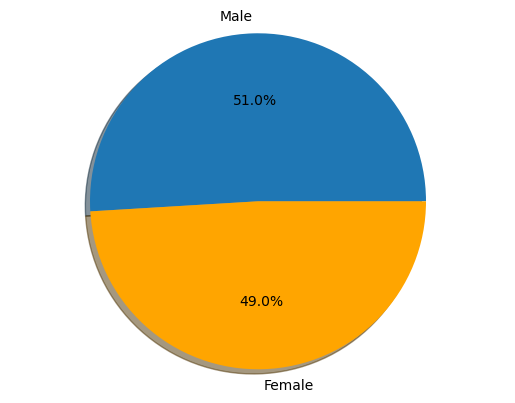

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#set up the chart
pie_data = clean_data['Sex'].value_counts()
labels = ['Male', 'Female']
sizes = pie_data
colors = ['tab:blue', 'orange']
explode = (0, 0)

#create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Group the data by 'Drug Regimen' and calculate the sum of 'Tumor Volume (mm3)'
total_volume = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleanvolume_data = pd.merge(clean_data, total_volume, on=['Mouse ID', 'Timepoint'])

In [133]:
#Put treatments into a list for loop (and later for plot labels)
treatment_regimens= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Calculate the IQR and determine if there are arny outliers
tumor_volume_data = []

for regimen in treatment_regimens:
    treatment_data = cleanvolume_data[cleanvolume_data["Drug Regimen"] == regimen]
    tumor_volumes = treatment_data['Tumor Volume (mm3)']
    tumor_volume_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25, .5, .75])  
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) | 
    (treatment_data['Tumor Volume (mm3)'] > upper_bound)]['Tumor Volume (mm3)']
    
    print(f"{regimen}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


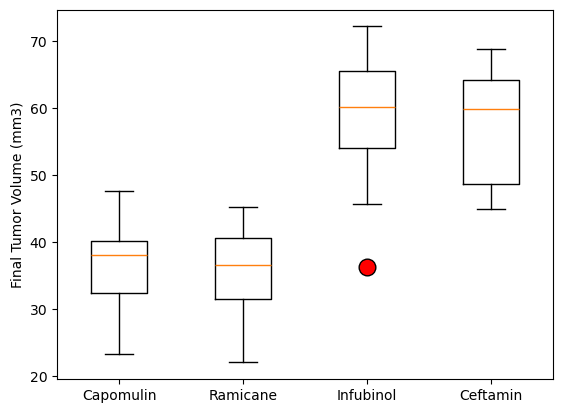

In [134]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume_data, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))
ax1.set_xticklabels(treatment_regimens)
plt.show()

## Line and Scatter Plots

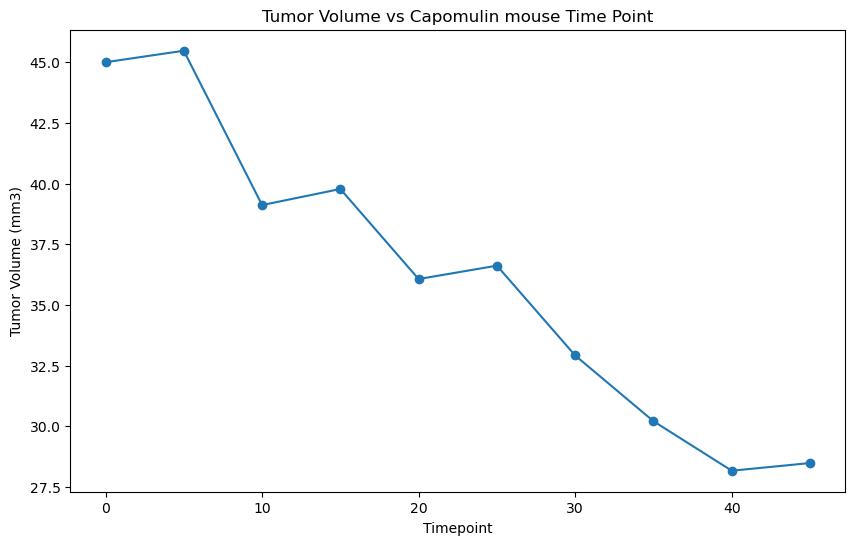

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Find the mice treated with Capomulin
capo_data = combined_data[combined_data['Drug Regimen']=='Capomulin']

# Find specific mouse data
capo_mouse = 'x401'
mouse_data = capo_data[capo_data['Mouse ID'] == capo_mouse]

# Plot the tumor against the time point
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker= 'o', color = 'tab:blue', label= capo_mouse)
plt.title('Tumor Volume vs Capomulin mouse Time Point')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

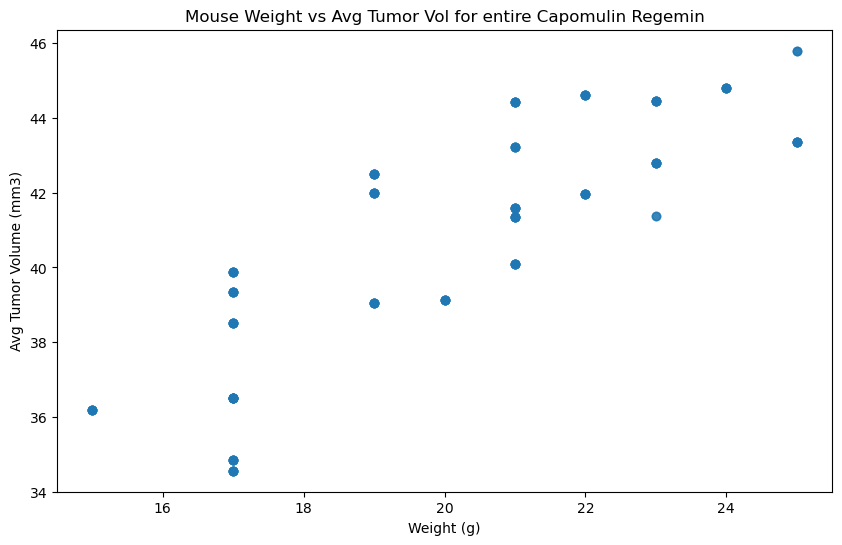

In [136]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter to only get Capomulin
capo_reg_data = combined_data[combined_data['Drug Regimen']== 'Capomulin']

# Find the average tumor for each mouse
avg_tumor = capo_reg_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the results
capomulin_data = pd.merge(capo_reg_data, avg_tumor, on='Mouse ID', suffixes=('','_avg'))
plt.figure(figsize=(10,6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)_avg'], color='tab:blue', alpha=0.5)
plt.title('Mouse Weight vs Avg Tumor Vol for entire Capomulin Regemin')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

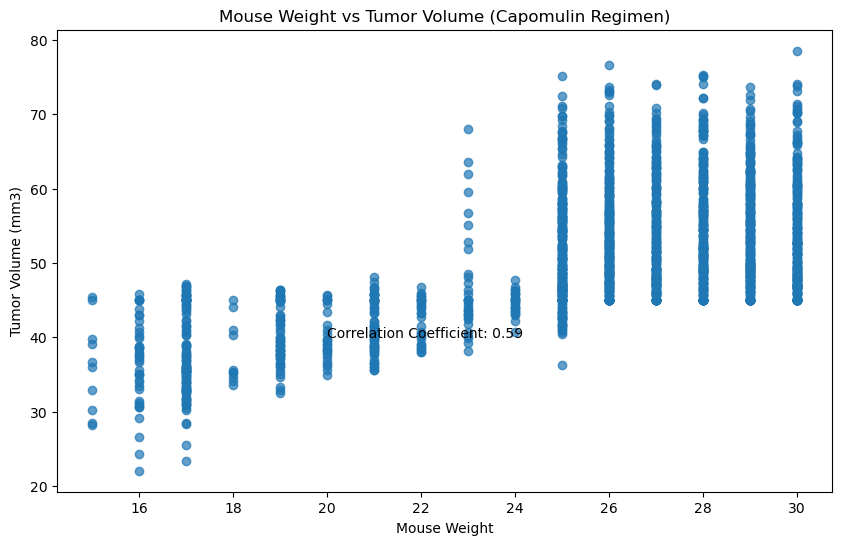

In [137]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = combined_data['Weight (g)'].corr(combined_data['Tumor Volume (mm3)'])

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(x='Weight (g)', y='Tumor Volume (mm3)', data=combined_data, color='tab:blue', alpha=0.7)
plt.title('Mouse Weight vs Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.text(20, 40, f'Correlation Coefficient: {correlation_coefficient:.2f}')
plt.show()